In [11]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import mne
import scipy
from mne.datasets.sleep_physionet.age import fetch_data

import epoch

In [12]:
psg_file = "data/SC4001E0-PSG.edf"
psg_data = mne.io.read_raw_edf(psg_file)

Extracting EDF parameters from c:\Tum\5-AR-local\AprendizajeAutomatico\72.75-ML\final\data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [13]:
fs = psg_data.info.get('sfreq')
print(fs,'Hz')

data = psg_data.get_data()
data.shape

100.0 Hz


(7, 7950000)

In [14]:
secs = data.shape[1]/fs
print(f'{secs} segundos')
print(f'{secs/60} minutos')
print(f'{secs/60/60} horas\n')


print(f"Channel names = {psg_data.ch_names}\n")
print(f"Channel types = {psg_data.get_channel_types()}")
print(f"Len = {len(psg_data['EEG Fpz-Cz'][0][0])}")

79500.0 segundos
1325.0 minutos
22.083333333333332 horas

Channel names = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']

Channel types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
Len = 7950000


In [15]:
len(psg_data['EEG Fpz-Cz'][0][0])
t = psg_data['EEG Fpz-Cz'][1]
t

array([0.000000e+00, 1.000000e-02, 2.000000e-02, ..., 7.949997e+04,
       7.949998e+04, 7.949999e+04])

In [16]:
print(psg_data.info.get('ch_names'))
EEG_Fpz_Cz, EEG_Pz_Oz, EOG_Horizontal, Resp_oro_nasal, EMG_submental, Temp_rectal, Event_marker= data[0], data[1], data[2], data[3], data[4], data[5], data[6]

['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [17]:
#add annotations
hypnogramm_file = "data/SC4001EC-Hypnogram.edf"
hypnogramm_annotations = mne.read_annotations(hypnogramm_file)
psg_data.set_annotations(hypnogramm_annotations)


C:\Users\flo12\AppData\Local\Temp\ipykernel_19188\2458527308.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  psg_data.set_annotations(hypnogramm_annotations)


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~13 kB, data not loaded>

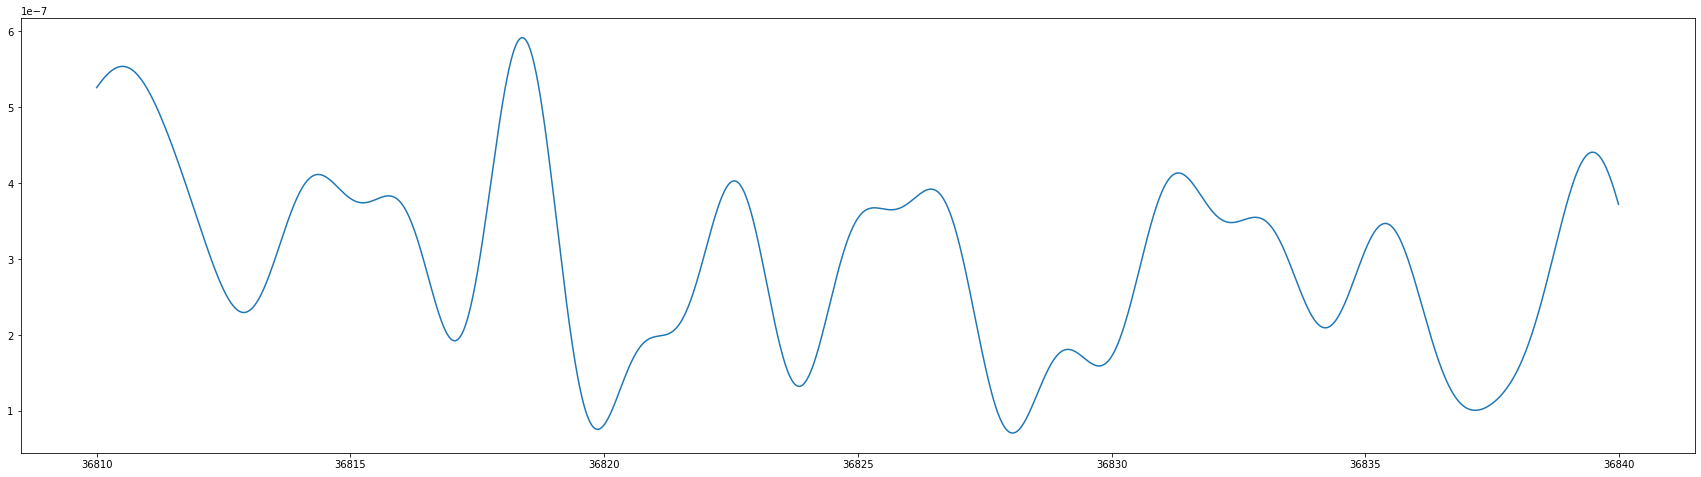

2


In [18]:


EPOCH_LENGTH = 30
epoch = 1227
epoch_start = int(epoch*EPOCH_LENGTH*fs)
epoch_end = int((epoch + 1)*EPOCH_LENGTH*fs)    


# FILTRADO
N = 5 # Orden del filtro
wn = [1,10] # Frecuencias de corte del filtro
sos = scipy.signal.butter(N, wn, btype = 'bandpass', output = 'sos', fs = fs) # Diseño el filtro
filtrada = scipy.signal.sosfiltfilt(sos, EEG_Fpz_Cz) # Filtro la señal


plt.figure(figsize=(30,8))
#plt.plot(t[epoch_start:epoch_end] ,EEG_Fpz_Cz[epoch_start:epoch_end])
plt.plot(t[epoch_start:epoch_end] ,EMG_submental[epoch_start:epoch_end])
plt.show()


start_datetime = psg_data.info['meas_date']
a = psg_data.annotations.copy().crop(
    start_datetime.timestamp() + epoch * EPOCH_LENGTH,
    start_datetime.timestamp() + epoch * EPOCH_LENGTH + EPOCH_LENGTH)
print(len(a))

In [28]:
#load same data from epoch
import epoch


s = epoch.sleepRecording()
s.init_from_file("data/SC4001E0-PSG.edf","data/SC4001EC-Hypnogram.edf")


Extracting EDF parameters from c:\Tum\5-AR-local\AprendizajeAutomatico\72.75-ML\final\data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Tum\5-AR-local\AprendizajeAutomatico\72.75-ML\final\epoch.py:93: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  psg_data_raw.set_annotations(hypnogramm_annotations)


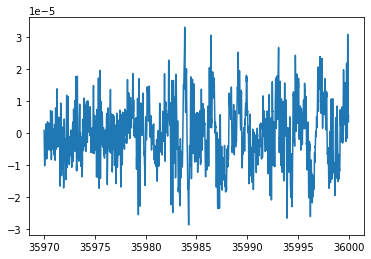

In [29]:
epoch = s.get_epochs_by_label("Sleep stage R")[0]
plt.plot(epoch.data_time ,epoch.get_channle_by_name("EEG Pz-Oz"))
plt.show()

Epoch test

In [31]:
import filters
s = epoch.sleepRecording()
s.init_from_file("data/SC4001E0-PSG.edf","data/SC4001EC-Hypnogram.edf")

Extracting EDF parameters from c:\Tum\5-AR-local\AprendizajeAutomatico\72.75-ML\final\data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Tum\5-AR-local\AprendizajeAutomatico\72.75-ML\final\epoch.py:93: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  psg_data_raw.set_annotations(hypnogramm_annotations)


asf


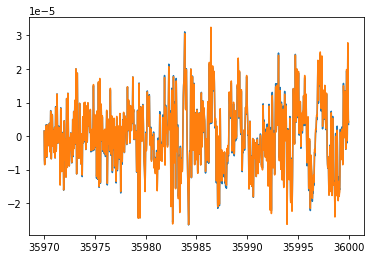

In [33]:
# channles ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']
epoch = s.get_epochs_by_label("Sleep stage R")[0]
print("asf")
plt.plot(epoch.data_time ,epoch.get_channle_by_name("EEG Pz-Oz"))
s.apply_filter(filters.bandpass_filter(filters.bandpass_filter.wn_EEG), ["EEG Pz-Oz", "EEG Fpz-Cz"])
s.apply_filter(filters.bandpass_filter(filters.bandpass_filter.wn_EOG), ["EOG horizontal"])
s.apply_filter(filters.bandpass_filter(filters.bandpass_filter.wn_EMG), ["EMG submental"])
plt.plot(epoch.data_time ,epoch.get_channle_by_name("EEG Pz-Oz"))
plt.show()